In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


La base de datos cats vs. dogs, se encuentra en el sitio https://www.kaggle.com/c/dogs-vs-cats/data y fue publicada por el sitio https://www.kaggle.com/ en el 2013 como parte de una competencia de visión computacional. Contiene un total de 25,000 imágenes, 12,500 de gatos y 12,500 de perros. En nuestro caso, usaremos un subconjunto de dicha base de datos.

In [2]:
import os, shutil
import zipfile

#Extracción de la base de datos
local_zip = '/content/drive/My Drive/CNNs/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

FileNotFoundError: ignored

In [ ]:
import os
# Carpeta donde se almacena la base de datos descargada
base_dir = '/content/cats_and_dogs_filtered'

# Carpetas donde se almacenan los conjuntos de entrenamiento y validación
train_dir = os.path.join(base_dir, 'train') # '/content/drive/My Drive/CNNs/cats_and_dogs_filtered/train'
validation_dir = os.path.join(base_dir, 'validation') # '/content/drive/My Drive/CNNs/cats_and_dogs_filtered/validation'

# Carpeta donde se almacenan las imágenes de gatos del conjunto de entrenamiento
train_cats_dir = os.path.join(train_dir, 'cats') #'/content/drive/My Drive/CNNs/cats_and_dogs_filtered/train/cats'

# Carpeta donde se almacenan las imágenes de perros del conjunto de entrenamiento
train_dogs_dir = os.path.join(train_dir, 'dogs') #'/content/drive/My Drive/CNNs/cats_and_dogs_filtered/train/dogs'

# Carpeta donde se almacenan las imágenes de gatos del conjunto de validación
validation_cats_dir = os.path.join(validation_dir, 'cats') # '/content/drive/My Drive/CNNs/cats_and_dogs_filtered/validation/cats'

# Carpeta donde se almacenan las imágenes de perros del conjunto de validación
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # # '/content/drive/My Drive/CNNs/cats_and_dogs_filtered/validation/dogs'

In [ ]:
print('Número de imágenes de gatos pertencientes al conjunto de entrenamiento:', len(os.listdir(train_cats_dir)))

Número de imágenes de gatos pertencientes al conjunto de entrenamiento: 1000


In [ ]:
print('Número de imágenes de perros pertencientes al conjunto de entrenamiento:', len(os.listdir(train_dogs_dir)))

Número de imágenes de perros pertencientes al conjunto de entrenamiento: 1000


In [ ]:
print('Número de imágenes de gatos pertencientes al conjunto de validación:', len(os.listdir(validation_cats_dir)))

Número de imágenes de gatos pertencientes al conjunto de validación: 500


In [ ]:
print('Número de imágenes de perros pertencientes al conjunto de validación::', len(os.listdir(validation_dogs_dir)))

Número de imágenes de perros pertencientes al conjunto de validación:: 500


# **Construcción de la CNN**

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# **Compilación**

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']) # acc -> accuracy

# **Preprocesamiento de las imágenes de entrada**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator #Sirve para acceder y manipular las instancias de la base de datos

#Todas las imágenes se normalizan en el rango de [0,1]
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Carpeta del conjunto de entrenamiento
        train_dir,
        # Las imágenes se redimensionan a 150 X 150
        target_size=(150, 150),
        batch_size=20,
        #Mediante el argumento class_mode, se define el tipo de clasificación que se llevará a cabo. En este caso, es clasificación binaria.
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# **Entrenamiento**

In [ ]:
history = model.fit(
      train_generator, #Conjunto de entrenamiento
      steps_per_epoch=100, #Número de veces que se tomarán 20 (batch_size) lotes de imágenes
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6843 - acc: 0.5455 - val_loss: 0.6571 - val_acc: 0.6140
Epoch 2/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6317 - acc: 0.6405 - val_loss: 0.6179 - val_acc: 0.6320
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5805 - acc: 0.6905 - val_loss: 0.6280 - val_acc: 0.6380
Epoch 4/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5415 - acc: 0.7160 - val_loss: 0.5628 - val_acc: 0.7050
Epoch 5/30
100/100 [==============================] - 8s 85ms/step - loss: 0.5193 - acc: 0.7345 - val_loss: 0.5414 - val_acc: 0.7260
Epoch 6/30
100/100 [==============================] - 8s 85ms/step - loss: 0.4807 - acc: 0.7710 - val_loss: 0.5462 - val_acc: 0.7170
Epoch 7/30
100/100 [==============================] - 9s 85ms/step - loss: 0.4613 - acc: 0.7845 - val_loss: 0.5389 - val_acc: 0.7280
Epoch 8/30
100/100 [==============================] - 9s 86ms/step - 

In [ ]:
model.save('/content/drive/My Drive/CNNs/cats_and_dogs_small_1.h5')

In [ ]:
tf.keras.models.load_model('/content/drive/My Drive/CNNs/cats_and_dogs_small_1.h5', compile=False)

# **Curvas de precisión y pérdida**

Best accuracy epoch  14
Best loss epoch  14


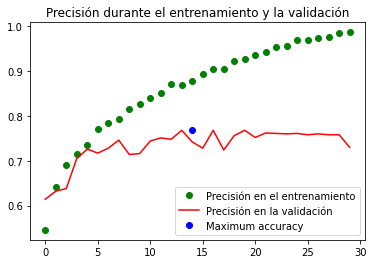

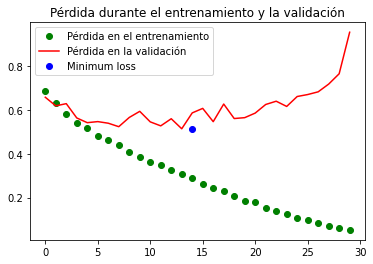

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print('Best accuracy epoch ', max_val_acc_epoch)
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Best loss epoch ', min_val_loss_epoch)

plt.show()

# **Aumentación de datos**

Mediante el proceso de aumentación de datos, Keras brinda la posibilidad de incrementar el número de imágenes del conjunto de entrenamiento, a través de la generación de imágenes sintéticas.<br> 
Algunas de las transformaciones para aumentación de datos, son las siguientes:<br>
**rotation_range =** Orientación aleatoria de las imágenes en el rango de 0-180.<br>
**width_shift_range/height_shift_range =** Traslación horizontal/vertical de las imágenes en un rango aleatorio determinado. Este rango está delimitado por las dimensiones de la imagen.<br>
**shear_range =** Ángulo aleatorio de inclinación de la imagen. A diferencia de la rotación, en shear_range se deja fijo un eje y a partir de este, se realiza la inclinación. Visualmente, esta transformación da la impresión de estirar la imagen.<br>
**zoom_range =** Zoom aleatorio a la imagen.<br>
**horizontal_flip =** Cuando su valor es de True, la mitad de las imágenes se voltean horizontalmente. Las imágenes que se voltean se eligen de forma aleatoria.<br>
**fill_mode =** Estrategia para rellenar las zonas de la imagen que quedan vacías al aplicar transformaciones como rotation_range o width_shift_range/height_shift_range.


In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

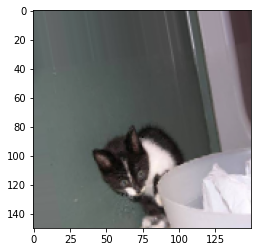

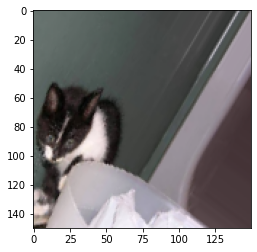

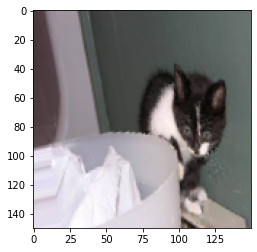

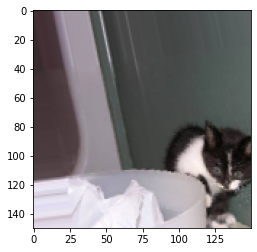

In [ ]:
# Este módulo de Keras permite procesar imágenes
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Elegimos una imagen para aumentar
img_path = fnames[3]

# Leemos y redimensionamos la imagen
img = image.load_img(img_path, target_size=(150, 150))

# Convertimos la imagen a un numpy array con dimensiones (150, 150, 3)
x = image.img_to_array(img)

# Redimensionamos el array a (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# El comando flow () genera lotes de imágenes transformadas de forma aleatoria.
# Este flujo es infinito, así que tenemos que terminarlo explícitamente.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
datagen = ImageDataGenerator(
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.7)
      zoom_range=0.8)
      #horizontal_flip=True
      #fill_mode='nearest')

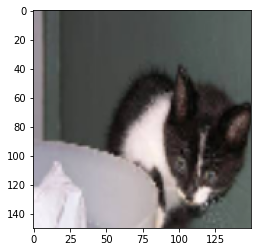

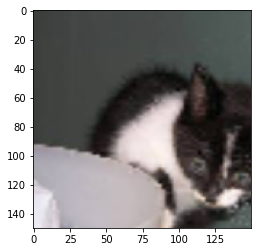

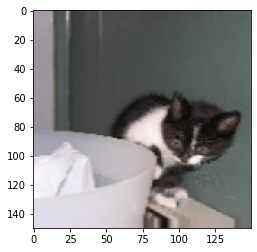

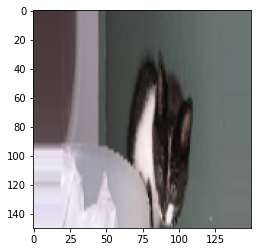

In [ ]:
# Este módulo de Keras permite procesar imágenes
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Elegimos una imagen para aumentar
img_path = fnames[3]

# Leemos y redimensionamos la imagen
img = image.load_img(img_path, target_size=(150, 150))

# Convertimos la imagen a un numpy array con dimensiones (150, 150, 3)
x = image.img_to_array(img)

# Redimensionamos el array a (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# El comando flow () genera lotes de imágenes transformadas de forma aleatoria.
# Este flujo es infinito, así que tenemos que terminarlo explícitamente.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# **Definimos de nuevo la arquitectura, pero ahora considerando que usaremos aumentación de datos.**

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# **Preprocesamiento de las imágenes de entrada**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# El conjunto de validación no debe ser aumentado
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Carpeta del conjunto de entrenamiento
        train_dir,
        # Las imágenes se redimensionan a 150 X 150
        target_size=(150, 150),
        batch_size=20,
        #Al emplear binary_crossentropy como función de pérdida, las etiquetas deben ser binarias.
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Entrenamiento**

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 26s 257ms/step - loss: 0.6934 - acc: 0.5215 - val_loss: 0.6821 - val_acc: 0.5690
Epoch 2/100
100/100 [==============================] - 25s 252ms/step - loss: 0.6852 - acc: 0.5415 - val_loss: 0.6858 - val_acc: 0.5070
Epoch 3/100
100/100 [==============================] - 26s 256ms/step - loss: 0.6719 - acc: 0.5720 - val_loss: 0.6491 - val_acc: 0.6330
Epoch 4/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6636 - acc: 0.5910 - val_loss: 0.6365 - val_acc: 0.6170
Epoch 5/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6533 - acc: 0.6095 - val_loss: 0.6128 - val_acc: 0.6570
Epoch 6/100
100/100 [==============================] - 25s 251ms/step - loss: 0.6424 - acc: 0.6360 - val_loss: 0.6643 - val_acc: 0.6030
Epoch 7/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6300 - acc: 0.6445 - val_loss: 0.5797 - val_acc: 0.6940
Epoch 8/100
100/100 [===========================

In [ ]:
model.save('/content/drive/My Drive/CNNs/cats_and_dogs_small_2.h5')

# **Curvas de precisión y pérdida**

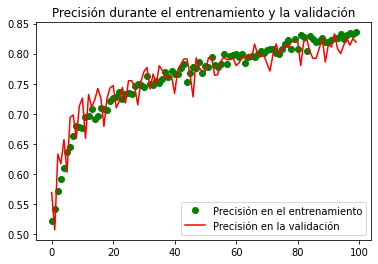

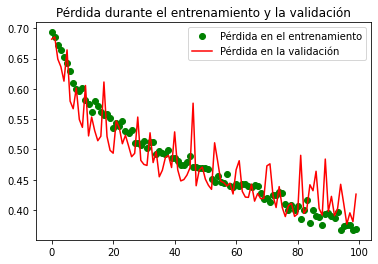

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print('Best accuracy epoch ', max_val_acc_epoch)
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Best loss epoch ', min_val_loss_epoch)

plt.show()

# **Transferencia de aprendizaje / Fine-tuning**

En este caso, utilizaremos la arquitectura VGG16, sin embargo, la forma de importar las otras arquitecturas es exactamente la misma. Para más información sobre la arquitectura VGG16, por favor revisar la siguiente referencia: <br>
Karen Simonyan and Andrew Zisserman, “Very Deep Convolutional Networks for Large-Scale Image Recognition,” arXiv (2014), https://arxiv.org/abs/1409.1556.

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
#Congelamos y descongelamos ciertas capas
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# **Definimos la arquitectura basada en transfer learning**

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# **Preprocesamiento de las imágenes de entrada**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# El conjunto de validación no debe ser aumentado
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Carpeta del conjunto de entrenamiento
        train_dir,
        # Las imágenes se redimensionan a 150 X 150
        target_size=(150, 150),
        batch_size=20,
        #Al emplear binary_crossentropy como función de pérdida, las etiquetas deben ser binarias.
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Entrenamiento**

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 30s 295ms/step - loss: 0.4328 - acc: 0.8005 - val_loss: 0.2157 - val_acc: 0.9060
Epoch 2/100
100/100 [==============================] - 29s 293ms/step - loss: 0.3213 - acc: 0.8555 - val_loss: 0.1776 - val_acc: 0.9270
Epoch 3/100
100/100 [==============================] - 29s 291ms/step - loss: 0.2850 - acc: 0.8740 - val_loss: 0.2306 - val_acc: 0.9070
Epoch 4/100
100/100 [==============================] - 29s 291ms/step - loss: 0.2618 - acc: 0.8975 - val_loss: 0.1906 - val_acc: 0.9300
Epoch 5/100
100/100 [==============================] - 29s 291ms/step - loss: 0.2312 - acc: 0.9050 - val_loss: 0.2284 - val_acc: 0.9380
Epoch 6/100
100/100 [==============================] - 29s 292ms/step - loss: 0.2296 - acc: 0.9055 - val_loss: 0.1936 - val_acc: 0.9390
Epoch 7/100
100/100 [==============================] - 29s 290ms/step - loss: 0.2197 - acc: 0.9085 - val_loss: 0.2145 - val_acc: 0.9320
Epoch 8/100
100/100 [===========================

In [ ]:
model.save('/content/drive/My Drive/CNNs/cats_and_dogs_small_3.h5')

# **Curvas de precisión y pérdida**

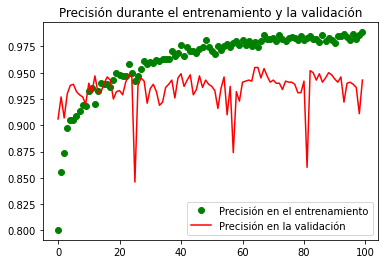

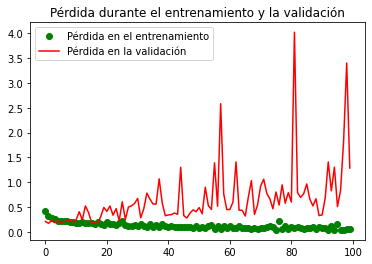

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print('Best accuracy epoch ', max_val_acc_epoch)
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Best loss epoch ', min_val_loss_epoch)

plt.show()

# **Visualización de activación intermedias**

En las siguientes celdas, se definará el código que permitirá visualizar el resultado de las salidas de las capas convolucionales y max-pooling de la segunda CNN que entrenamos (en la que aplicamos aumentación de datos).

In [ ]:
from keras.models import load_model
#Cargamos el modelo que ya debe estar guardado en nuestro Google Drive
model = load_model('/content/drive/My Drive/CNNs/cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
#Ruta de alguna imagen que pertenezca al conjunto de validación
img_path = '/content/cats_and_dogs_filtered/validation/dogs/dog.2104.jpg'

# Preprocesamos la imagen en un tensor 4D
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Recuerda que el modelo fue entrenado con imágenes
#de entrada que se preprocesaron de la siguiente manera:
img_tensor /= 255.

# Su dimensión es de (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


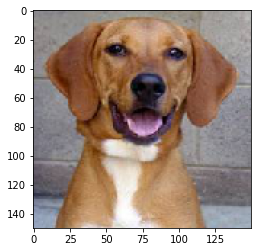

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models

# Extracción de las salidas de las primeras 8 capas:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creación de un modelo que regresará estas salidas, dada una entrada:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
# Esta línea de código permite retornar una lista de 8 numpy arrays: un array por capa
activations = activation_model.predict(img_tensor)

In [ ]:
#Salida de la primera capa convolucional
first_layer_activation = activations[7]
print(first_layer_activation.shape)

(1, 7, 7, 128)


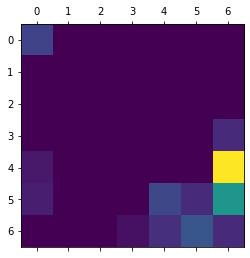

In [ ]:
import matplotlib.pyplot as plt
#Visualizamos la salida representada en el cuarto mapa de características de la primera capa convolucional
plt.matshow(first_layer_activation[0, :, :, 127], cmap='viridis')
plt.show()

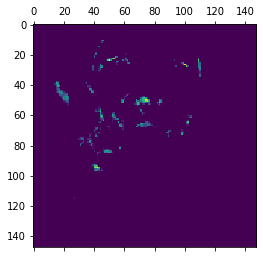

In [ ]:
#Visualizamos la salida representada en el mapa de características no. 31 de la primera capa convolucional
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


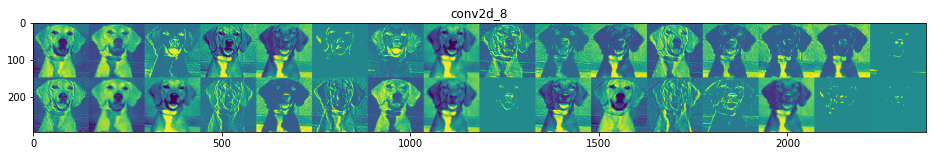

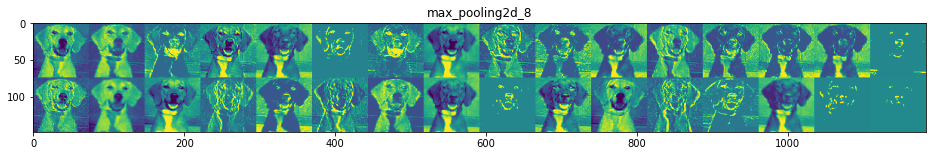

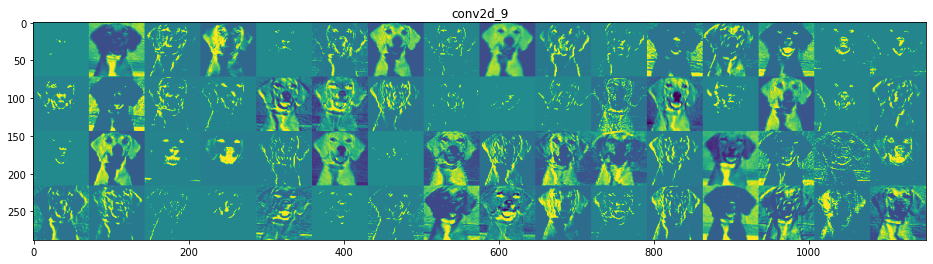

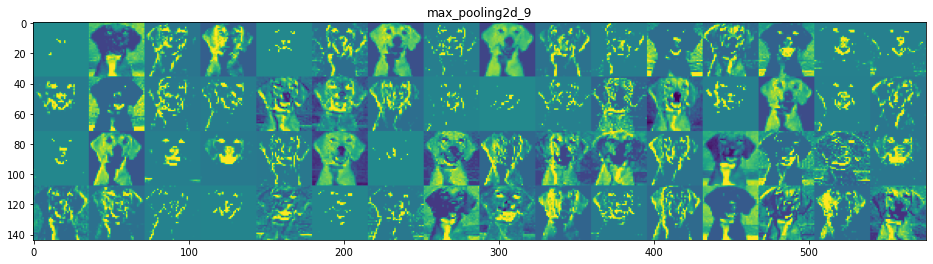

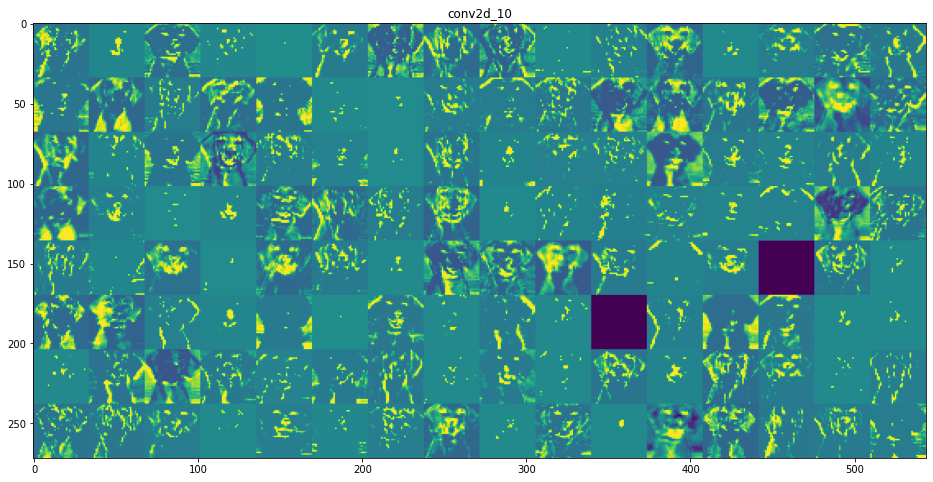

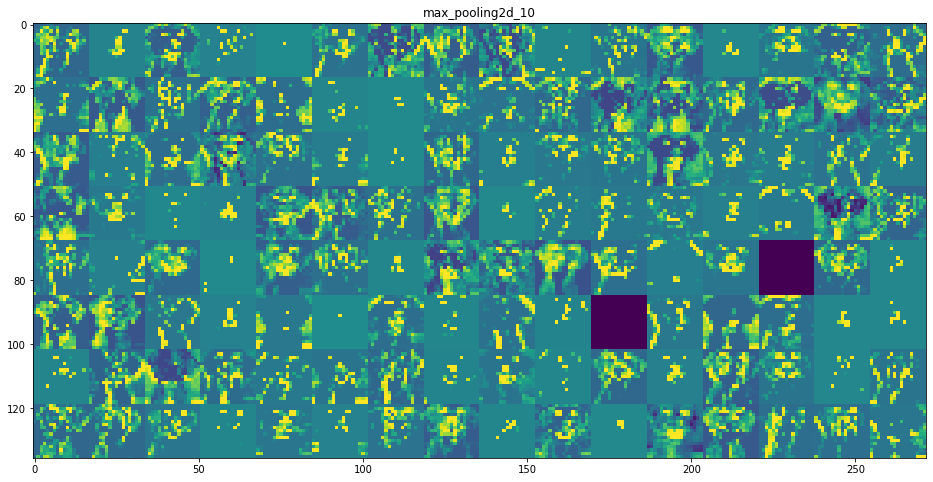

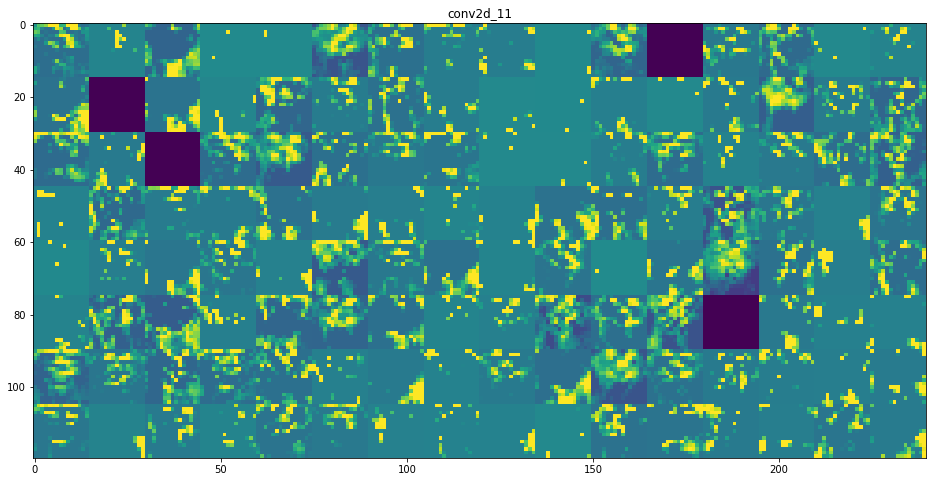

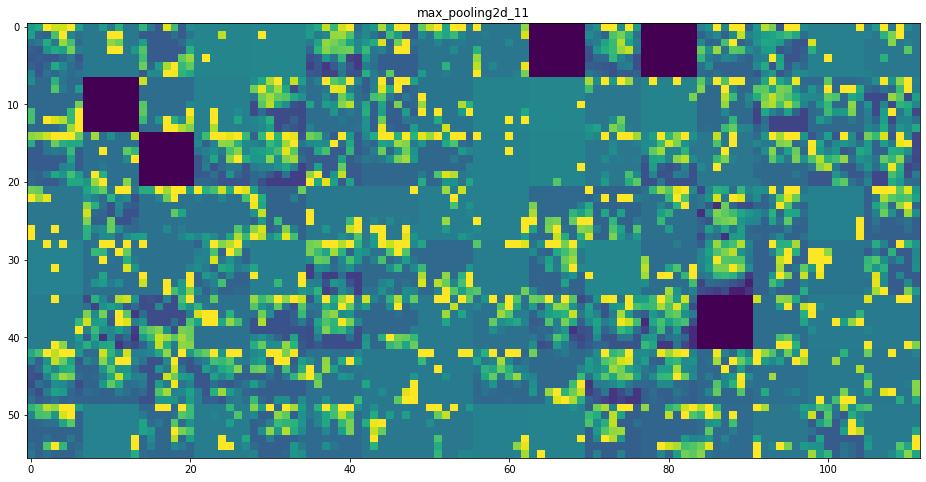

In [ ]:
import keras

# Extraemos los nombres de las capas para mostrarlos en nuestra gráfica
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Visualicemos los mapas de características
for layer_name, layer_activation in zip(layer_names, activations):
    # Este es el número de neuronas que componen el mapa de características en cuestión
    n_features = layer_activation.shape[-1]

    # Las dimensiones del mapa de características son (1, size, size, n_features)
    size = layer_activation.shape[1]

    # Concatenaremos los canales de activación (mapas de características) en esta matriz
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # Procedemos a concatenar los canales de activación dentro de un marco o rejilla
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Aplicamos un post-procesamiento a los mapas de características para que sean
            # visualmente ilustrativos
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Desplegamos la rejilla de canales de activación
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

# **Visualización de filtros convolucionales**

En esta sección, visualizaremos cuáles son los filtros receptivos a una imagen de entrada. Para llevar a cabo este procesamiento, usaremos el método de ascenso de gradiente, el cual será aplicado a una imagen de entrada a escala de grises, donde los valores de los píxeles se definirán aleatoriamente. Mediante este método, los píxeles de la imagen a escala de grises se ajustarán gradualmente hasta que un filtro en cuestión responda al máximo a la imagen.<br>

Para implementar exitosamente este procedimiento, debemos construir una función de pérdida que maximice el valor de un filtro en específico, entonces, a través del ascenso de grandiente, se ajustarán los valores de lo píxeles de la imagen de entrada de tal forma que estos valores maximicen la activación del filtro. Para ilustrar lo anterior, a continuación definiremos una función de pérdida para la activación del filtro 0 de la capa "block3_conv1" de la arquitectura VGG16: 

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

Para implementar ascenso de gradiente, usaremos la función *gradients* que viene incluida en el módulo *backend* de Keras:

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# La función gradiente retorna una lista de tensores, en este caso, la lista sólo contiene un elemento,
# por eso es que tenemos que extraer ese único elemento.

grads = K.gradients(loss, model.input)[0]

Con la finalidad de suavizar las actualizaciones realizadas durante el ascenso de gradiente, vamos a normalizar el gradiente extraído en la celda anterior. Esta normalización se llevará a cabo mediante la norma L2, que es la raíz cuadrada del promedio del cuadrado de los valores presentes en el tensor. Esta normalización, limita la magnitud de las actualizaciones hechas a los píxeles de la imagen de entrada a un mismo rango.

In [ ]:
# Agregamos 1e-5 para evitar dividir entre 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

Ahora que ya tenemos los prototipos de las funciones que permiten obtener la pérdida y el gradiente, tenemos que integrarlas en otra función que sea resposable de calcular tanto la pérdida como el gradiente dada una imagen de entrada. Para ello, usaremos un función backend de Keras: *iterate*. Esta función, recibe como entrada a la imagen de entrada y a las funciones de pérdida y de ascenso de gradiente, generando como resultado, los valores de la pérdida y del gradiente.

In [ ]:
iterate = K.function([model.input], [loss, grads])

# Llamada a la función iterate
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

Ahora, definiremos un loop para aplicar sucesivamente el ascenso de gradiente:

In [ ]:
# Definimos una imagen de entrada a escala de grises, generada aleatoriamente y con ruido incluido.
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# El ascenso de gradiente se aplicará durante 40 épocas:
lr = 1.  # tasa de aprendizaje
for i in range(40):
    # Calculo de las valores de pérdida y de gradiente
    loss_value, grads_value = iterate([input_img_data])
    # Actualizamos los píxeles de la imagen de entrada en una dirección que maximice la pérdida
    input_img_data += grads_value * lr

La imagen resultante, tendrá dimensiones (1, 150, 150, 3). Además, los valores de cada píxel serán de tipo float y es posible que no estén en el rango de [0, 255], así que para compensar esto, aplicaremos la siguiente función de post-procesamiento:

In [ ]:
def deprocess_image(x):
    # Normalización del tensor: centrado en 0 y con desviación estándar de 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # Nos aseguramos que cada píxel tenga un valor de 0 o 1 mediante la función clip.
    x += 0.5
    x = np.clip(x, 0, 1)

    # Convertimos el tensor en un arreglo RGB
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

Ahora, retomemos las operaciones que definimos previamente y construyamos una función que tome como entrada el nombre de una capa y el índice de un filtro, y que retorne una imagen que represente el filtro que se activa al máximo a partir de la imagen de entrada a escala de grises.

In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
    # Definimos una función de pérdida que maximice la activación
    # de un filtro determinado perteneciente a una capa determinada.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Definimos la función ascenso de gradiente
    grads = K.gradients(loss, model.input)[0]

    # Normalización del gradiente
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # La función iterate retorna la pérdida y el gradiente de acuerdo a una imagen de entrada
    iterate = K.function([model.input], [loss, grads])
    
    # Nuestra imagen de entrada es una imagen a escala de grises con algo de ruido
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # El ascenso de gradiente se aplicará durante 40 épocas:
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

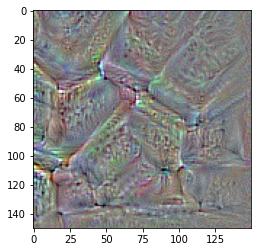

In [ ]:
#Probemos nuestra función:
plt.imshow(generate_pattern('block5_conv3', 12))
plt.show()

Buscando tener un panorma más amplio de los filtros que responden a la imagen de entrada, a continuación concatenaremos múltiples filtros en una rejilla. Específicamente, mostraremos los primeros 64 filtros de la primera capa convolucional de cada bloque de la arquitectura VGG16. La rejilla será de 8X8, y entre cada filtro, colocaremos un margen negro.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


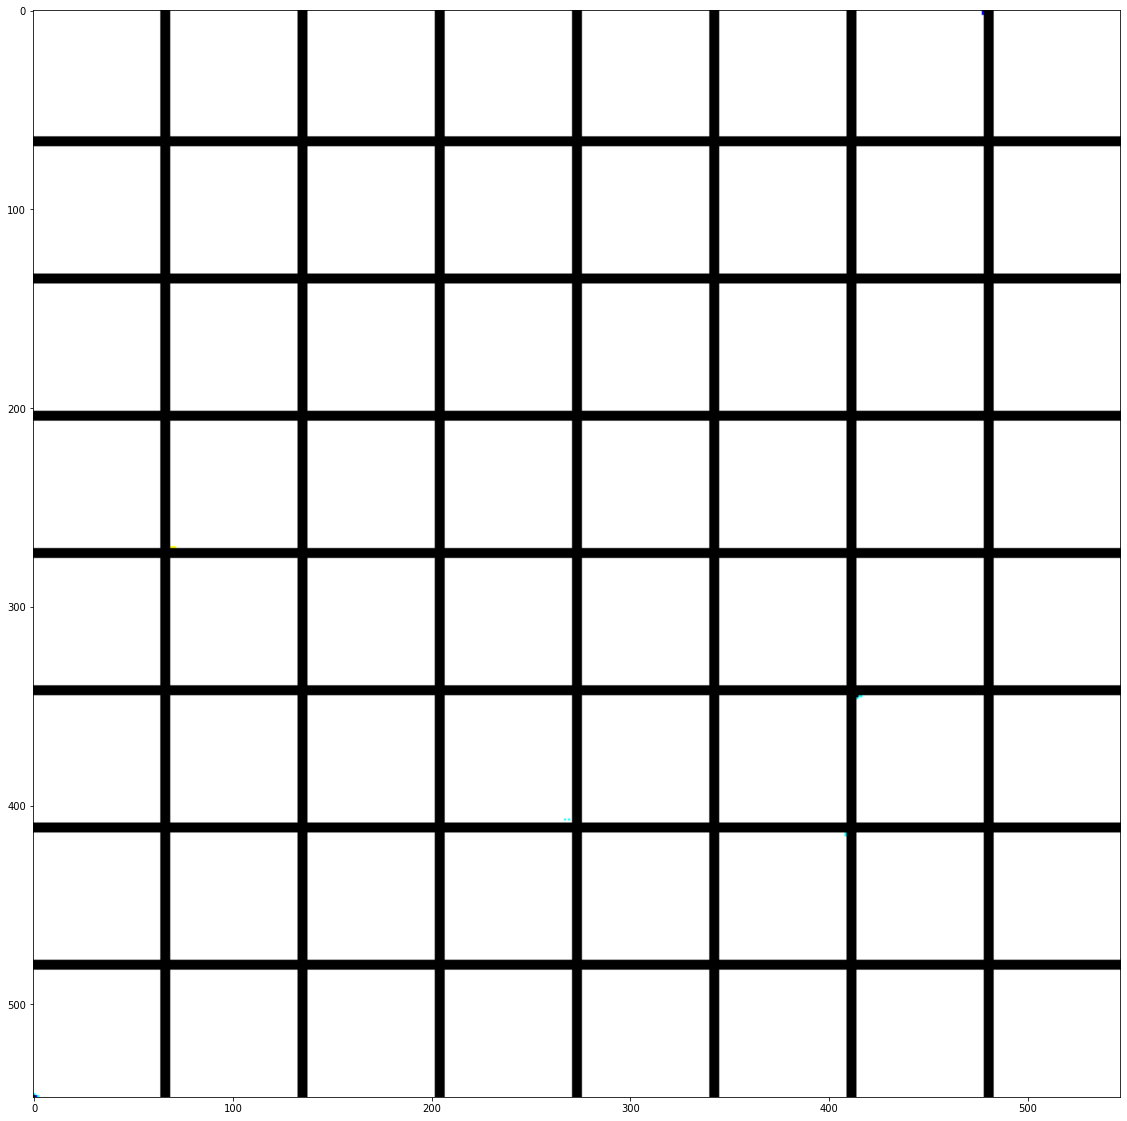

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


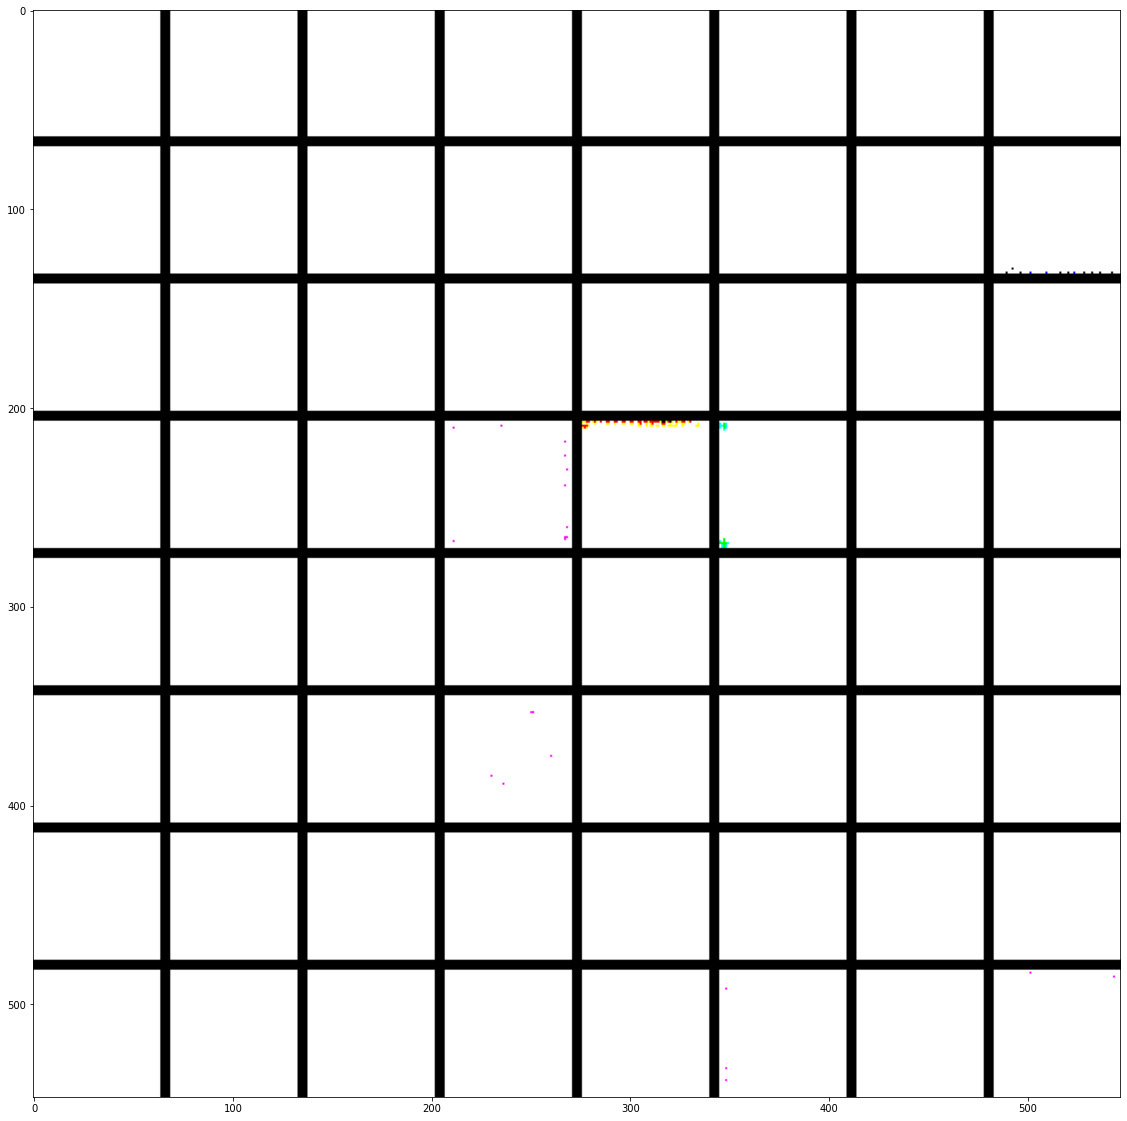

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


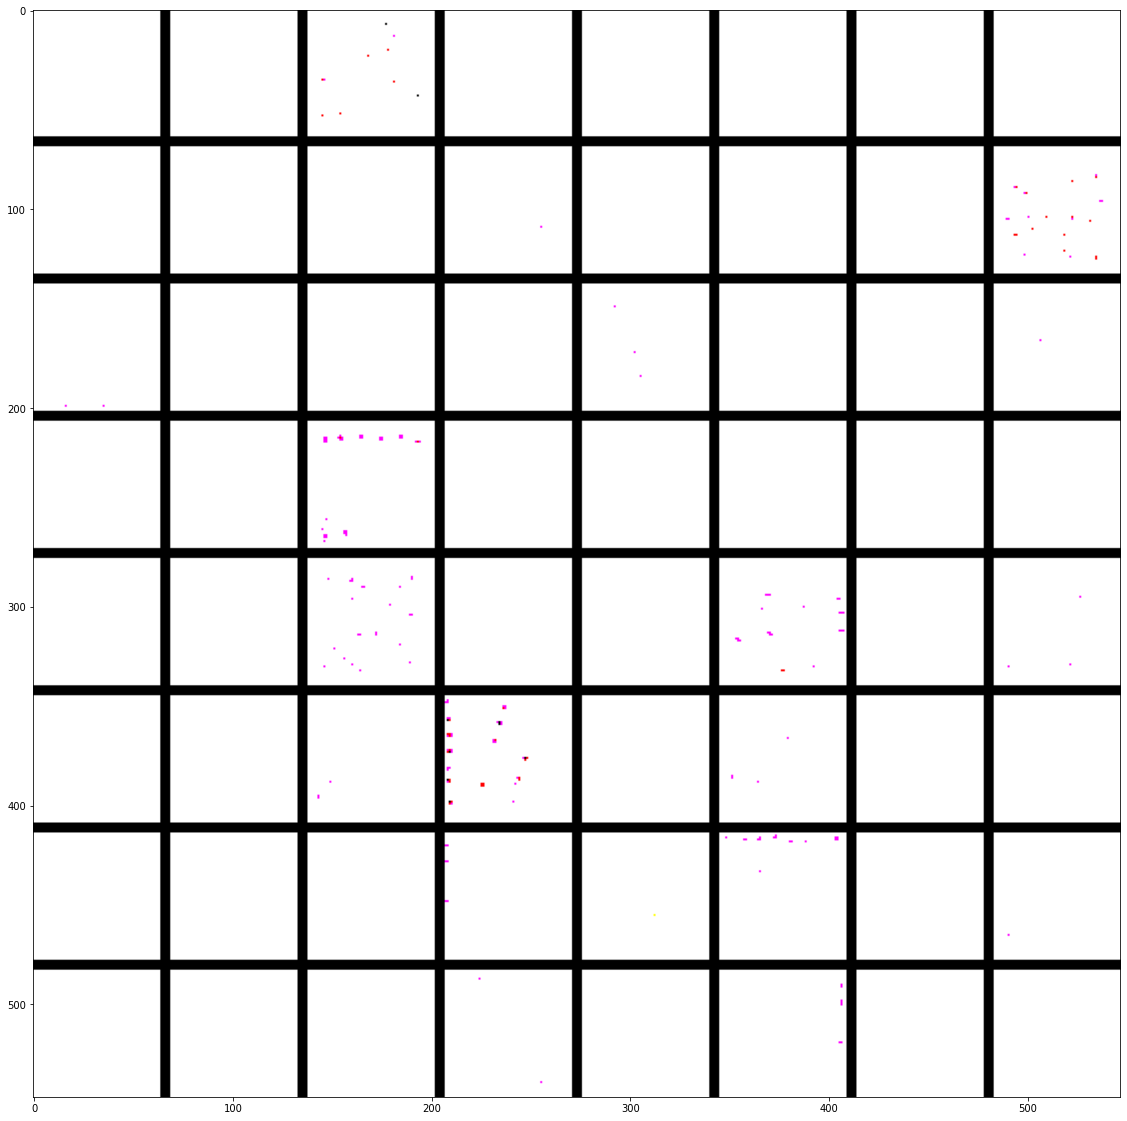

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


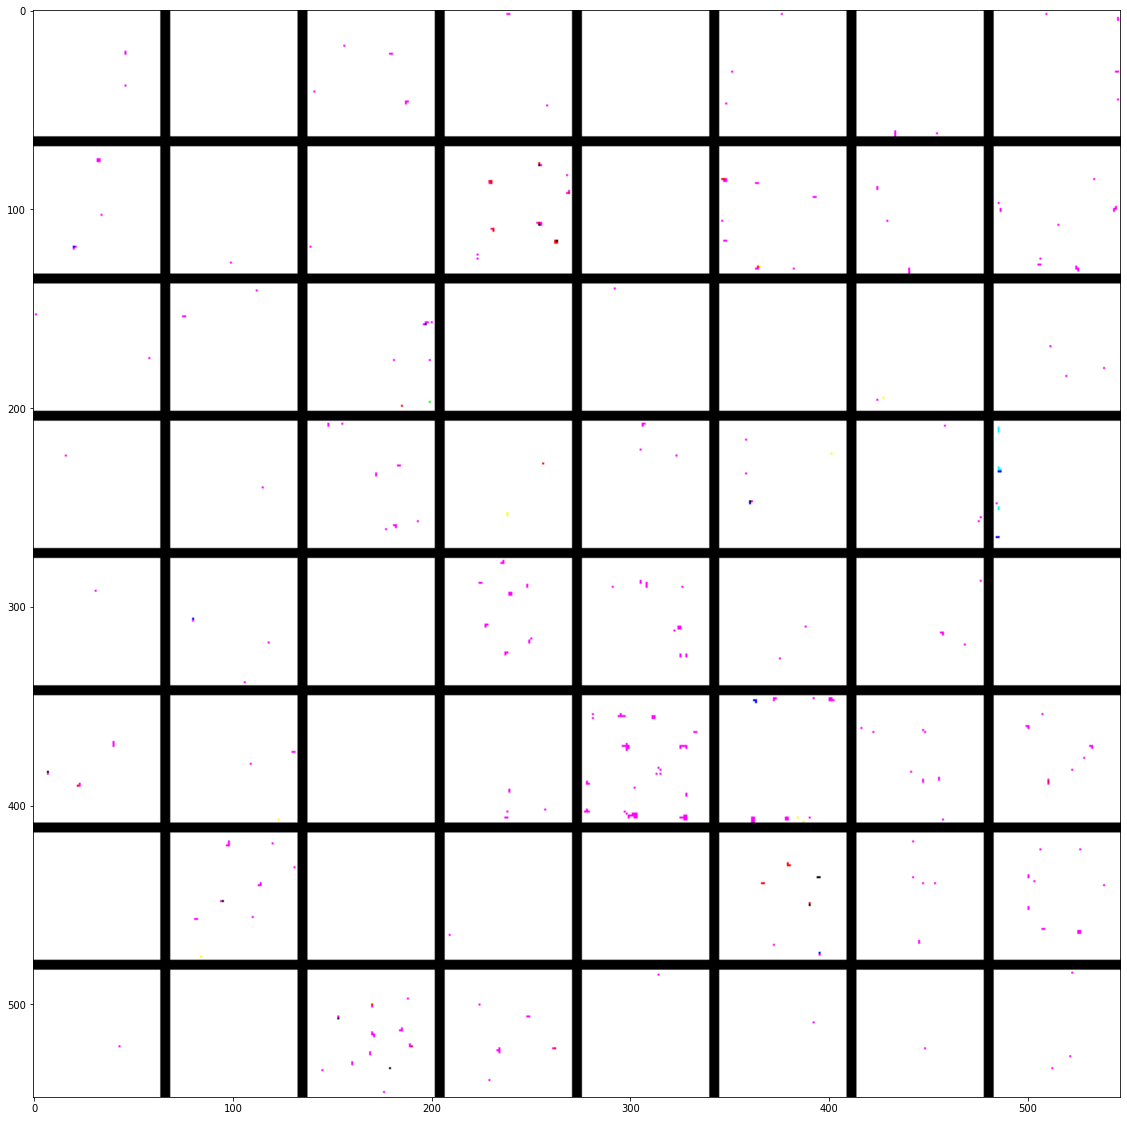

In [ ]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # Definimos una imagen negra que será el marco de la rejilla y nos servirá para almacenar cada filtro.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iteramos sobre las filas de la rejilla
        for j in range(8):  # iteramos sobre las columnas de la rejilla
            # Obtenemos el filtro activado número 'i + (j * 8)' ubicado en la capa 'layer_name'
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Ponemos el resultado en el cuadrado '(i, j)' correspondiente a una posición de la rejilla
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Desplegamos la rejilla
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

# **Visualización de mapas de calor de clases de activación (heatmaps of class activation)**

Mediante esta técnica podemos identificar de forma visual, cuáles son las regiones de la imagen de entrada que la red neuronal considera esenciales para realizar la clasificación. Aplicando esta técnica, se puede "debuggear" el funcionamiento de una red neuronal, sobre todo, cuando se tiene un error en la clasificación. Además, también es posible ubicar objetos específicos en una imagen.<br>
Esta técnica forma parte de un conglomerado de técnicas llamado visualización "Class Activation Map" (CAM), y consiste en producir mapas de calor de "clases de activación" sobre imágenes de entrada. Un mapa de calor de "clase de activación" es un tensor 2D que indica que tan importante es cierta región de la imagen con respecto a una clase en particular. Por ejemplo, dada una imagen de entrada de un perro, CAM genera un mapa de calor para la clase perro, y este mapa de calor puede posicionarse en una zona de la imagen del perro que sea característica de este, como las orejas o el hocico. <br>
La implementación de CAM que se utilizará, consiste en tomar los mapas de características producidos por una capa convolucional a partir de una imagen de entrada, y aplicarle a cada mapa de características el gradiente de la clase con respecto a dicho mapa. De forma intuitiva, una forma de entender este procedimiento, es que estamos ponderando "la intensidad con la que la imagen de entrada activa diferentes canales o mapas de activación" con respecto a "cuán importante es cada canal con respecto a la clase", resultando en "la intensidad con la que la imagen de entrada activa la clase". La implementación que realizaremos, proviene de la siguiente fuente:<br>
Ramprasaath R. Selvaraju, Michael Cogswell, Abhishek Das, Ramakrishna Vedantam, Devi Parikh, Dhruv Batra, “Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization,” arXiv (2016), https://arxiv.org/abs/1610.02391.

In [ ]:
#Procedamos a importar la arquitectura VGG16:

In [ ]:
from keras.applications.vgg16 import VGG16

K.clear_session()

# Observen como están cargando la arquitectura completa, incluyendo la capa final de clasificación.
model = VGG16(weights='imagenet')

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#Es necesario preprocesar la imagen para ingresarla al modelo VGG16:

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Ruta donde se encuentra almacenada la imagen
img_path = '/content/drive/My Drive/CNNs/elephants.jpg'

# Cargamos la imagen con las dimensiones correctas
img = image.load_img(img_path, target_size=(224, 224))

# 'x' es un numpy array tipo float32 con dimensiones (224, 224, 3)
x = image.img_to_array(img)

# Agregamos una dimensión para transformar nuestro arreglo en un
# batch con dimensiones (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Preprocesamos el batch. Este preprocesamiento
# normaliza cada canal
x = preprocess_input(x)

In [ ]:
# Predicción
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.9094213), ('n01871265', 'tusker', 0.08618258), ('n02504013', 'Indian_elephant', 0.004354576)]


In [ ]:
np.argmax(preds[0])

386

In [ ]:
# Este es el elemento correspondiente al "elefante africano" del vector de predicción
african_elephant_output = model.output[:, 386]

# Esta es la salida de la capa convolucional 'block5_conv3',
# que es la última capa convolucional de la arquitectura VGG16
last_conv_layer = model.get_layer('block5_conv1')

# Este es el gradiente de la clase "elefante africano" con respecto
# a los mapas de características de la capa 'block5_conv3'
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# Este es un vector de dimensiones (512, ), donde cada elemento
# representa la intensidad media del gradiente sobre un mapa de características específico
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# Esta función permite acceder a los valores de las cantidades que acabamos de definir:
# 'pooled grads' y los mapas de características de la capa 'block5_conv3', dada una imagen de entrada
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# Estos son los valores de estas dos cantidades, representadas como numpy arrays, de acuerdo 
# a la imagen de entrada de los dos elefantes
pooled_grads_value, conv_layer_output_value = iterate([x])

# Multiplicamos cada mapa de características por "cuan importante este mapa de características es"
# con respecto a la clase elefante.
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# Obtenemos la media de cada elemento de cada mapa de características, generando así
# nuestro mapa de calor de la clase de activación
heatmap = np.mean(conv_layer_output_value, axis=-1)

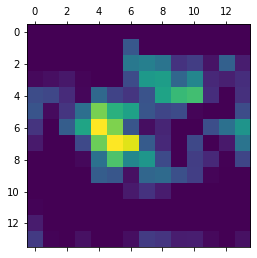

In [ ]:
#Normalizamos cada elemento de cada mapa de características en el rango de [0, 1]
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [ ]:
import cv2

# Utilizamos opencv para cargar la imagen original
img = cv2.imread(img_path)

# Redimensionamos el mapa de calor para que tenga el mismo tamaño que la imagen original
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Convertimos el mapa de calor a RGB
heatmap = np.uint8(255 * heatmap)

# Aplicamos el mapa de calor a la imagen original
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 es un factor de intensidad del mapa de calor
superimposed_img = heatmap * 0.4 + img

# Guardamos la imagen
cv2.imwrite('/content/drive/My Drive/CNNs/elephant_cam3.jpg', superimposed_img)

True

La base de datos usada en este notebook, se obtuvo de la siguiente fuente:<br>
https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb <br>
En lo que respecta al código y a la teoría que antecede a cada celda de código, ambos se tomaron y en su caso, se adaptaron, de la siguiente fuente:<br>
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb <br>
Asimismo, la teoría antes presentada puede estudiarse con más amplitud en el libro "Deep Learning with Python", de François Chollet, específicamente, en el capítulo 5.4. Este libro se los pasé por Slack.